# We need to importing the relevant libraries.

In [77]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
import seaborn as sns

# Loading  the Dataset

In [78]:
data=pd.read_csv("C:/Users/BENJAMIN/Downloads/insurance.csv")

In [79]:
data.info()  #Obtaining the information about the loaded dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [80]:
data.head()  #Display the first 5 rows.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
columns=data.columns.values.tolist()  #Printing a list of all columns by their names.
print(columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


# Understanding the basic statistics of the data

In [82]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# checking  the outliers of the data and checking the outliers 

<AxesSubplot: >

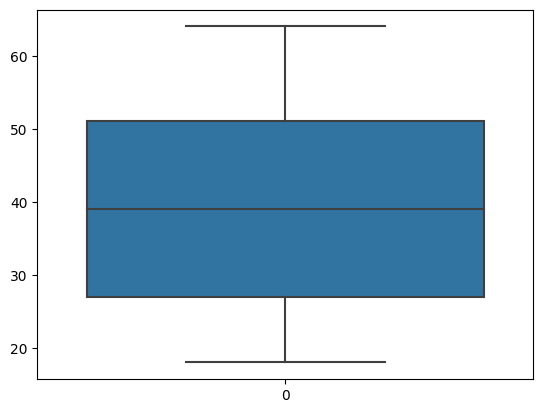

In [83]:
sns.boxplot(data["age"])

<AxesSubplot: >

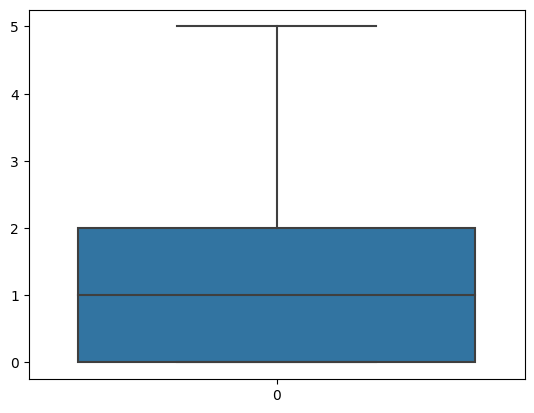

In [84]:
sns.boxplot(data["children"])

# Data preprocessing 

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [86]:
data["sex"]=le.fit_transform(data["sex"])

In [87]:
data["smoker"]=le.fit_transform(data["smoker"])

In [88]:
data["region"]=le.fit_transform(data["region"])

In [89]:
print (data)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [90]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# finding the correlation of the features 

<AxesSubplot: >

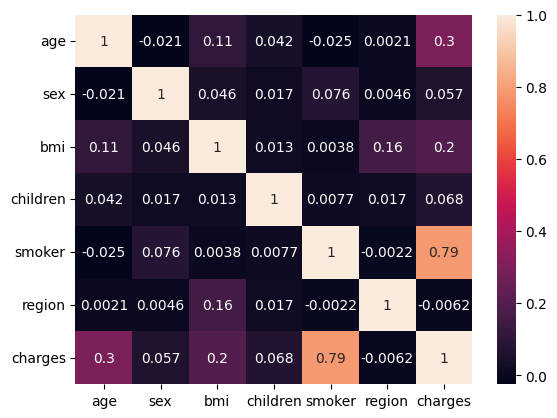

In [91]:
data_corre=data.corr()
sns.heatmap(data_corre, annot=True)

In [92]:
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
x=data.drop(["charges"],axis=1)
y=data["charges"]
print(x, y)


      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Training the dataset 

In [94]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train, x_test, y_train, y_test)


      age  sex     bmi  children  smoker  region
332    61    0  31.160         0       0       1
355    46    1  27.600         0       0       3
138    54    0  31.900         3       0       2
381    55    1  30.685         0       1       0
292    25    1  45.540         2       1       2
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       0
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       0
860    37    0  47.600         2       1       3
1126   55    1  29.900         0       0       3

[936 rows x 6 columns]       age  sex     bmi  children  smoker  region
764    45    0  25.175         2       0       0
887    36    0  30.020         0       0       1
890    64    0  26.885         0       1       1
1293   46    1  25.745         3       0       1
259    19    1  31.920         0       1       1
...   ...  ...     ...       ...     ...     ...
701    50    0  44.745         0       0     

# Using the linear regression model  to predict the charges for a new customer 

In [95]:
reg=LinearRegression()
reg.fit(x_train,y_train)
predictions=reg.predict(x_test)
print(predictions)


[ 8.93142116e+03  7.07090670e+03  3.69370805e+04  9.59699214e+03
  2.70083549e+04  1.08664849e+04  3.74610217e+01  1.72228092e+04
  9.18308115e+02  1.13965537e+04  2.79154456e+04  9.53381323e+03
  5.18928014e+03  3.86124990e+04  4.05094490e+04  3.72748566e+04
  1.53562559e+04  3.59449407e+04  9.10631783e+03  3.14429410e+04
  3.66298253e+03  1.00966745e+04  2.21091896e+03  7.10598084e+03
  1.13521417e+04  1.30231210e+04  1.44472857e+04  6.12031303e+03
  9.94564893e+03  2.18617424e+03  8.91389260e+03  1.31869496e+04
  4.49110116e+03  3.30469662e+03  4.32885102e+03  1.32330189e+04
  1.67071398e+03  8.63238607e+03  3.32727214e+04  3.26840062e+04
  3.60294190e+03  4.40040903e+03  1.40663345e+04  1.16268203e+04
  8.89219642e+03  1.21011367e+04  5.23906853e+03  2.84241293e+03
  3.56294259e+04  9.27854339e+03  1.59720792e+04  2.34524488e+03
  1.24695907e+04  1.45575199e+03  1.36060478e+04  1.27386152e+04
  4.36613796e+03  3.22719994e+04  1.32349447e+04  1.29578859e+04
  1.40951649e+04  1.05369

# we created a machine learning algorithm that is able to predict customer churn with an accuracy of 76.94%

In [96]:
from  sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7694415927057693

# Finally we evaluate the model in terms of MAE, RMSE and MSE

In [97]:
import numpy as np
y=np.array([3, -1, -2, 1, -1, 1, 2, 1, 3, 4, 3, 5])
yhat=np.array([-2, 1, -1, 0, -1, 1, 2, 2, 3, 3, 3, 5])
x=list(range(len(y)))

<function matplotlib.pyplot.show(close=None, block=None)>

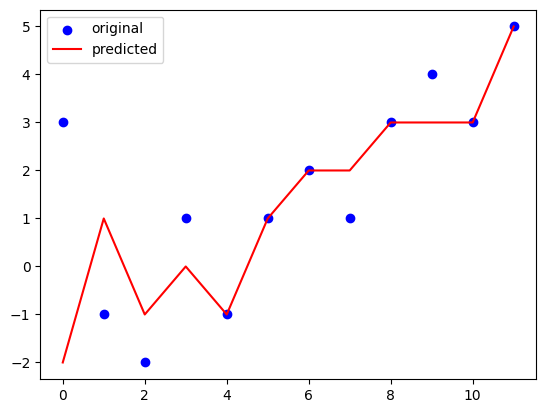

In [98]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color ="blue", label="original")
plt.plot(x, yhat,  color="red", label ="predicted")
plt.legend()
plt.show

In [99]:
d=y-yhat
mse_f=np.mean(d**2)
mae_f=np.mean(abs(d))
rmse_f=np.sqrt(mse_f)
r2_f=1-(sum(d**2)/sum((y-np.mean(y))**2))
print( " MSE is: ", mse_f)
print("MAE is: ", mae_f)
print("RMSE is: ", rmse_f)
print("R-squared: ", r2_f)

 MSE is:  2.75
MAE is:  0.9166666666666666
RMSE is:  1.6583123951777
R-squared:  0.3518821603927986
